# Random Forest Modle<br>
ECS171 Group 19<br>
Zherui Xie

### I.Import Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
class Reader:
    def __init__(self, path, mode='f'):
        
        self.df = self.wrapper(path,mode)
    
    # read arff file
    def readarff(self, filename,collect=True): #collect if you need to collect attribute names
        with open(filename) as f:
            content = f.read().splitlines()
        data = False
        metalist = [] # storets metadata as list of rows
        datalist = [] # store data as list of rows
        
        # read data line-by-line
        for line in content:
            if data == True:
                line = line.split(",")
                datalist.append(line)
            elif line == "@data":
                data = True # read lines before "@data" as metadata and after as data
            else:
              # clean up metadata header
              if collect:
                line = line.replace(' "', ".")
                line = line.replace('" ', ".")
                line = line.replace(" ","")
                line = line.split(".")
                if len(line)==3: #ignore first two lines of file
                    line = line[1:3] #remove repetitive "@attribute"
                    metalist.append(line)
        
        # create dataframes from lists of rows
        if not collect:
            dataframe = pd.DataFrame(datalist,dtype=float)
            return dataframe
        else:
            dataframe = pd.DataFrame(datalist,dtype=float)
            metaframe = pd.DataFrame(metalist,columns=["attribute","description"])
            attributes = metaframe["attribute"].rename("SAMPLE")
            return dataframe, attributes
    
    def readdirectory(self, path,quiet=False): # make sure path ends in a slash
        alldata = []
        count = 0
        for filename in os.listdir(path):
            if filename.endswith(".arff"):
                if count == 0: #only collect attributes once
                    if not quiet:
                          print("processing "+filename+"; collecting attribute names")
                    dataframe, attributes = self.readarff(path+filename)
                    alldata.append(dataframe)
                else:
                    if not quiet:
                        print("processing "+filename)
                    dataframe = self.readarff(path+filename,collect=False)
                    alldata.append(dataframe)
                count += 1
                continue
            else:
                continue
        if not quiet:
            print("Concatenating data")
        alldata = pd.concat(alldata).reset_index(drop=True) #reset indices so it is continuous
        alldata.columns = attributes #assign column names
        return alldata
    
    def wrapper(self, path, mode='f'):
        if mode == 'f':
            try:
                df =  self.readarff(path, collect = True)
                return df
            except:
                print("make sure you inputted the correct arff FILE path")
        elif mode == 'd':
            try:
                df =  self.readdirectory(path, quiet=True)
                return df
            except:
                print("make sure you inputted the correct arff DIRECTORY path, ending with a slash")
        else:
            print("mode must either be 'f' or 'd'")
            return 0

In [2]:
path="./phone_accel/"
phone_accel=Reader(path,mode='d').df
phone_accel

SAMPLE,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,A,0.235,0.470,0.275,0.020,0.000,0.0,0.0,0.0,0.0,...,0.486106,0.479859,-0.550668,0.049864,0.121354,-0.251024,0.164468,-0.110722,10.05180,1600.0
1,A,0.275,0.440,0.270,0.015,0.000,0.0,0.0,0.0,0.0,...,0.479571,0.473409,-0.633171,0.072129,0.161492,-0.386416,0.215680,-0.034375,10.11710,1600.0
2,A,0.320,0.430,0.245,0.000,0.005,0.0,0.0,0.0,0.0,...,0.483005,0.476798,-0.659493,0.087043,0.162157,-0.325151,0.272380,-0.077274,9.98384,1600.0
3,A,0.315,0.495,0.185,0.005,0.000,0.0,0.0,0.0,0.0,...,0.480711,0.474534,-0.712081,0.003810,0.210015,-0.364285,0.203131,0.015328,10.10600,1600.0
4,A,0.215,0.455,0.325,0.005,0.000,0.0,0.0,0.0,0.0,...,0.468836,0.462811,-0.534933,0.047553,0.275833,-0.216423,0.238500,-0.009870,10.05210,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23069,S,1.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.208123,0.205448,0.965885,-0.006364,-0.192099,-0.708716,0.720199,-0.651551,9.40653,1650.0
23070,S,1.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.247499,0.244319,0.965439,0.861812,0.919008,-0.792718,-0.641690,0.547467,9.41056,1650.0
23071,S,1.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.320125,0.316012,0.942726,0.542231,0.357909,-0.542299,0.309224,-0.571912,9.44613,1650.0
23072,S,1.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.276562,0.273008,0.932298,-0.270526,-0.518026,-0.797365,0.813487,-0.677182,9.44593,1650.0


### II. Process Data

In [3]:
# remove ACTIVITY, RESULTANT, MFCC values, COS values, and CORRELATION values
x = np.array(phone_accel[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'Y0', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Z0', 'Z1',
       'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'XAVG', 'YAVG', 'ZAVG',
       'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV',
       'XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'XVAR', 'YVAR', 'ZVAR', 'RESULTANT']])
y = np.array(phone_accel["ACTIVITY"])
y

array(['A', 'A', 'A', ..., 'S', 'S', 'S'], dtype=object)

In [4]:
# Split dataset into 70% training and 30% testing.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3)

### III. Train Data

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=200)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

### IV. Evaluate Data

In [6]:
#Mesure the mean accuracy
print("accuracy:",clf.score(x_test,y_test))

accuracy: 0.846309403437816


In [7]:
y_predict=clf.predict(x_test)

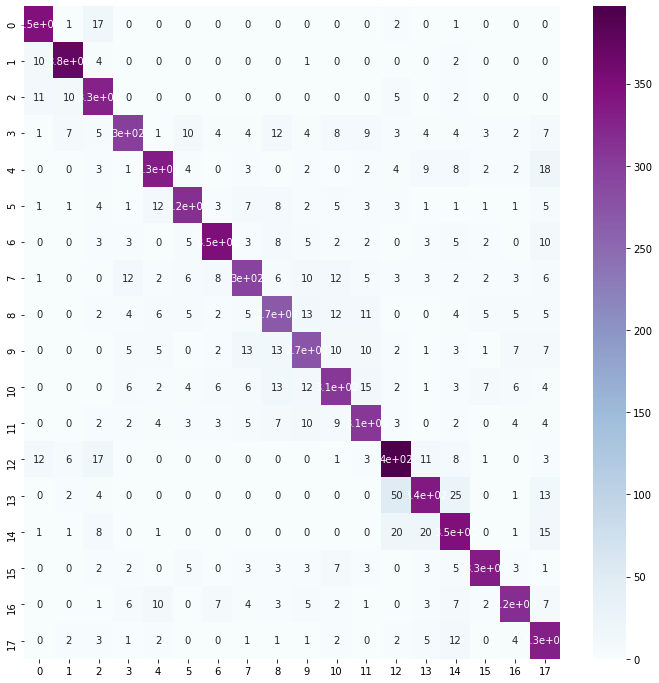

In [10]:
cm=confusion_matrix(y_test,y_predict)
plt.figure(figsize=(12,12))
sn.heatmap(cm,annot=True,cmap="BuPu")